In [1]:
### Scraping NBA Data

In [22]:
import time
import bs4 as bs
import pandas as pd 

from urllib.request import FancyURLopener  
from random import choice 
from bs4 import SoupStrainer, BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
# chrome_options = Options()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
# driver = webdriver.Chrome('/usr/local/bin/chromedriver', chrome_options = chrome_options)
driver = webdriver.Chrome()

user_agents = [
    'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
    'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16',
    'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246'
]

class MyOpener(FancyURLopener, object):
    version = choice(user_agents)
myopener = MyOpener()

invidivual_url = 'https://www.basketball-reference.com/'

col_names = ['Position', 'Age', 'Team', 'Games', 'Games Started', 'Minutes Played',
             'Field Goals', 'Field Goals Attempted', 'Field Goal Percentage', 'Three Pointers', 
             'Three Pointers Attempted', 'Three Point Percentage', 'Two Pointers', 'Two Pointers Attemped',
             'Two Point Percentage', 'eFG%', 'Free Throws', 'Free Throws Attempted', 'Free Throw Percentage',
             'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebound', 'Assists',
             'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points']

# Clear lists by running this block
i_season_years = []
i_stat_names = []
i_stats_list = []
######
    
def league_scraper():
    page = myopener.open('https://www.basketball-reference.com/leagues/NBA_' + which_season[5:9] + '_per_game.html')
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    time.sleep(5)
    
    player_names_html = soup.find_all('td', {'class': 'left'})
    for i in range(0, len(player_names_html)):
        player_names = player_names_html[i].find_all('a')
        if 'player' in str(player_names):
            player_names_list.append(player_names[0].get_text())

    all_players = soup.find_all('tr')
    for i in range(1, len(all_players)):
        player = all_players[i].find_all('td')
        for j in range(1, len(player)):
            player_stats = player[j].get_text()
            player_stats_list.append(player_stats)
    
    driver.get('https://www.basketball-reference.com/leagues/NBA_' + which_season[5:9] + '_per_game.html')
    i = 2
    team_code = []
    while i < len(player_stats_list):
        team_code.append(player_stats_list[i])
        i = i + 28
    '''
    team_code = list(dict.fromkeys(team_code))
    for i in range(len(team_code)):
        driver.findElement(By.linkText(team_code[i])).click()
        team_url = str(driver.current_url)
    '''

    x = 0
    y = 28
    for i in range(0,len(player_names_list)):
        player_stats_fixed.append(player_stats_list[x:y])
        x = x + 28
        y = y + 28
    
    df = pd.DataFrame(player_stats_fixed, columns = col_names)
    df.insert(0, 'Name', player_names_list)
    df.set_index('Name')
    df.apply(pd.to_numeric, errors='ignore')
    df.astype({'Position': str, 'Team': str})
    
    file_str = 'data/' + which_season + '_player_stats.csv'
    df.to_csv(file_str, sep='\t', index=False)_stats = input('Would you like to search for invidivual player stats (i) or league wide stats (l): ')
if which_stats == 'i':
    individual_stat_scaper(individual_url)
    stat_lookup()
elif which_stats == 'l':
    which_season = input('Enter the season you would like to find input for (i.e. 2018-2019): ')
    split_years = which_season.split('-')
    year1 = int(split_years[0])
    year2 = int(split_years[1])
    while year1 < 2018 and year2 < 2019:
        which_season = str(year1) + '-' + str(year2) 
        player_names_list = []
        player_stats_list = []
        player_stats_fixed = []
        league_scraper()
        player_names_list = []
        player_stats_list = []
        player_stats_fixed = []
        year1 = year1 + 1
        year2 = year2 + 1


SyntaxError: invalid syntax (<ipython-input-22-677f5c532f36>, line 92)

In [3]:
filename = which_season+' Player Stats.csv'
df.to_csv(filename, sep='\t', index=False)

NameError: name 'df' is not defined

In [4]:
# Objective 1: Find Relation Between "League Champion" and Player Stats
# First find the league champion
import os 

csv_dir = os.getcwd()
dir_tree = os.walk(csv_dir)
csv_list = []
for dirpath, dirnames, filenames in dir_tree:
    for file in filenames:
        if file.endswith('.csv'):
            csv_list.append(file)
            
combined_csv = pd.concat([pd.read_csv(f) for f in csv_list[0:8]])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

page = myopener.open('https://www.basketball-reference.com/leagues/NBA_' + which_season[5:9] + '_per_game.html')
time.sleep(5)
html = page.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
team_p_html = soup.find_all('p')
for i in range(len(team_p_html)):
    if 'teams' in str(team_p_html[i]):
        team_name_html = team_p_html[i].find('a')
        champions = team_name_html.get_text()
        break
    else:
        continue

In [5]:
print(champions)

Golden State Warriors


In [6]:
csv_list

['2015-2016 Player Stats.csv',
 '2010-2011 Player Stats.csv',
 'combined_csv.csv',
 '2014-2015 Player Stats.csv',
 '2017-2018 Player Stats.csv',
 '2011-2012 Player Stats.csv',
 '2012-2013 Player Stats.csv',
 '2013-2014 Player Stats.csv',
 '2016-2017 Player Stats.csv',
 '2015-2016 Player Stats-checkpoint.csv']

In [ ]:
df = pd.read_csv('2015-2016 Player Stats.csv', sep='\t', engine='python')
df

In [ ]:
df = df.groupby('Name').mean()
df

Text(0, 0.5, 'Three Pointers')

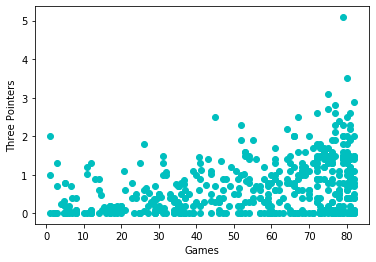

In [10]:
import matplotlib.pyplot as plt 

plt.scatter('Games', 'Three Pointers', c='c', data = df)
plt.xlabel('Games')
plt.ylabel('Three Pointers')

R^2: 0.71674309914771
Root Mean Squared Error: 2.793332056995373


ValueError: x and y must be the same size

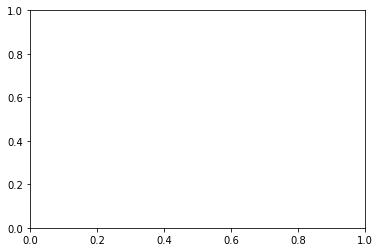

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

plt.scatter(X_test[:,:1].shape, y_train,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

In [136]:
y_test.shape

(143,)

In [48]:
X = df[['Games', 'Assists', 'Turnovers', 'Blocks', 'Steals']]
y = df['Points']
df_columns = ['Games', 'Assists', 'Turnovers', 'Blocks', 'Steals']

In [52]:
X.values



array([[69. ,  2.6,  1.2,  0.1,  0.4],
       [78. ,  1.6,  0.8,  0.7,  0.8],
       [21. ,  0.1,  0.2,  0. ,  0.3],
       ...,
       [68. ,  2.1,  1.5,  0.2,  0.6],
       [76. ,  1.7,  1.6,  0.3,  0.8],
       [68. ,  0.4,  0.9,  0.3,  0.3]])

In [54]:
page = myopener.open('https://www.basketball-reference.com/leagues/NBA_2019_per_game.html')
html = page.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
time.sleep(5)

player_names_html = soup.find_all('td', {'class': 'left'})
for i in range(0, len(player_names_html)):
    player_names = player_names_html[i].find_all('a')
    if 'player' in str(player_names):
        player_names_list.append(player_names[0].get_text())

all_players = soup.find_all('tr')
for i in range(1, len(all_players)):
    player = all_players[i].find_all('td')
    for j in range(1, len(player)):
        player_stats = player[j].get_text()
        player_stats_list.append(player_stats)

In [ ]:
driver.get('https://www.basketball-reference.com/leagues/NBA_2019_per_game.html')
i = 2
team_code = []
team_wins = []
team_losses = []
team_record = []
while i < len(player_stats_list):
    team_code.append(player_stats_list[i])
    i = i + 28
team_code = list(dict.fromkeys(team_code))
for i in range(len(team_code)):
    driver.find_element_by_link_text(team_code[i]).click()
    team_url = str(driver.current_url)
    page = myopener.open(team_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    team_record_html = soup.find_all('tr', {'class': 'rowSum'})
    print(team_record_html)
    # for j in range(len(team_record_html))
    driver.back()

In [76]:
team_url

'https://www.basketball-reference.com/teams/PHO/2019.html'

In [86]:
page = myopener.open('https://www.basketball-reference.com/teams/PHO/2019.html')
html = page.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
team_record_html = soup.find_all('strong')

None
